In [2]:
import pathlib
import PIL
import PIL.Image
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import glob

In [3]:
data_dir = pathlib.Path('O_or_R')
train_dir = os.path.join(data_dir, 'TRAIN')
train_O_dir = os.path.join(train_dir, 'O')
train_R_dir = os.path.join(train_dir, 'R')

val_dir = os.path.join(data_dir, 'TEST')
val_O_dir = os.path.join(val_dir, 'O')
val_R_dir = os.path.join(val_dir, 'R')

In [4]:
image_count = len(list(data_dir.glob('*/*/*.jpg')))
print(image_count)

25077


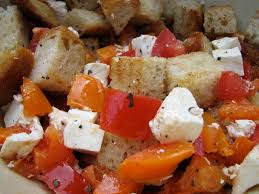

In [6]:
O = list(data_dir.glob('train/O/*.jpg'))
img = PIL.Image.open(str(O[10]))
img

In [7]:
batch_size = 32
img_height = 180
img_width = 180

train_ds = image_dataset_from_directory(train_dir,
                                        shuffle = True,
                                        batch_size =batch_size,
                                        image_size =(img_height, img_width))
val_ds = image_dataset_from_directory(val_dir,
                                      shuffle = True,
                                      batch_size = batch_size,
                                      image_size = (img_height, img_width))


Found 20178 files belonging to 2 classes.
Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Found 4899 files belonging to 2 classes.


2022-05-13 22:14:10.989588: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-13 22:14:10.990045: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(64, 3, activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2)
])

model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])


In [9]:
epochs=5
history = model.fit(train_ds,  
          validation_data=val_ds,
          epochs=epochs,) 

Epoch 1/5


2022-05-13 22:14:33.334889: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-13 22:14:33.335405: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


631/631 [==============================] - ETA: 0s - loss: 0.4456 - accuracy: 0.8006

2022-05-13 22:16:42.706785: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


631/631 [==============================] - 139s 219ms/step - loss: 0.4456 - accuracy: 0.8006 - val_loss: 0.3826 - val_accuracy: 0.8357
Epoch 2/5
631/631 [==============================] - 140s 222ms/step - loss: 0.3830 - accuracy: 0.8369 - val_loss: 0.3928 - val_accuracy: 0.8173
Epoch 3/5
631/631 [==============================] - 135s 214ms/step - loss: 0.3458 - accuracy: 0.8578 - val_loss: 0.3082 - val_accuracy: 0.8824
Epoch 4/5
631/631 [==============================] - 131s 207ms/step - loss: 0.3200 - accuracy: 0.8701 - val_loss: 0.2856 - val_accuracy: 0.8869
Epoch 5/5
631/631 [==============================] - 206s 327ms/step - loss: 0.2991 - accuracy: 0.8782 - val_loss: 0.2904 - val_accuracy: 0.8863


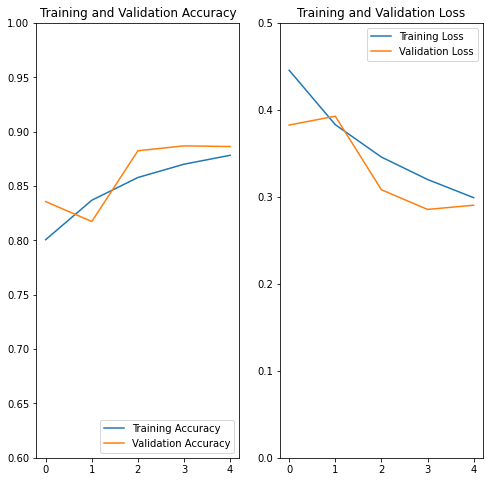

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.ylim(0.6,1)
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.ylim(0,0.5)
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

model.save('55model/55model.h5')